# ALB-$\mathbb{Q}$*

#### * A Little Bit Rational


###### TL;DR
ALB-$\mathbb{Q}$ est un outil qui permet de calculer la probabilité qu'une phrase soit exacte. C'est réalisé en notant toute les relations logiques que l'on connait... Les utilisateurs de ALB-$\mathbb{Q}$ peuvent voter pour donner leur avis sur une phrase. 

### Description générale

###### Chaque phrase est une proposition mathématique. 

Exemple de phrases :

* A = le ciel est bleu pendant la journée
* B = le ciel est vert
* C = Gerard dit que le ciel est vert
* D = Gerard a toujours raison
* E = le ciel n'est pas bleu
* F = La diffusion de Rayleigh rend le ciel bleu en journée

###### Il existe des relations entre propositions. Certaines propositions en entrainant d'autres.

Exemple de relations, 

en notant "et" ".", en notant "ou" "+", en notant "la négation de "$\neg$", et "implique" "$\rightarrow$"

* "Gerard dit que le ciel est vert"."Gerard a toujours raison" $\rightarrow$ "le ciel est vert"
* "le ciel est vert" $\rightarrow$ $\neg$ "le ciel est bleu pendant la journée"
* "le ciel est bleu pendant la journée" $\rightarrow$ $\neg$ "le ciel est vert"
* "La diffusion de Rayleigh rend le ciel bleu en journée" $\rightarrow$ "le ciel est bleu pendant la journée"
* "le ciel est vert" $\rightarrow$  "le ciel n'est pas bleu"

ce que l'on peut noter :

* C.D  $\rightarrow$ B 
* B $\rightarrow$ $\neg$ A
* A $\rightarrow$ $\neg$ B
* F $\rightarrow$ A
* B $\rightarrow$ E

###### Chaque proposition est associée à une valeur décrivant la probabilité que cette proposition soit vraie.

Typiquement cette valeur est la probabilité de la proposition.

Pour certaines propositions la valeur de probabilité est fixée, car provenant d'une source extérieure. Par exemple la probabilité d'existence du boson BEH peut-être donné par les papiers publiés par le CERN.

###### Chaque proposition est associée à un descripteur de la quantité d'informations permettant d'associé la proposition à sa probabilité.

En première approximation, ce descripteur est la fonction de répartition de la probabilité de la proposition.

###### Chaque utilisateur peut donner son avis sur n'importe quelle proposition.

Un utilisateur peut donner son avis sur une proposition.

L'ensemble des avis des utilisateurs est ensuite moyenné pour donner une relation de la form :

* "l'ensemble des utilisateur pensent que cette proposition est vraie"."les utilisateur ont raisons"  $\rightarrow$ la proposition ..

évidemment, la première proposition a comme probabilité la proportion des utilisateurs à penser cette proposition (ou un estimateur de cette probabilité ..), et la seconde proposition est la proportion, globalement, d'erreurs entre l'avis des utilisateurs et les probabilités calculés par ALB-$\mathbb{Q}$.

### Fonctionnement général

Les données que ALB-$\mathbb{Q}$ traitent peuvent donc se résumer en quatre catégories :

- les propositions, avec leur probabilité et leur descripteur de quantité d'information
- l'ensemble des relations entre propositions
- les avis des utilisateurs sur telle ou telle proposition

ALB-$\mathbb{Q}$ transforme l'ensemble des relations en un système d'équations booléeennes.

Ensuite un système, encore à définir, résoud ce système d'équation pour avoir les propositions sous la forme :

* $ A = f($ propositions dont les descripteurs sont connus $)$

Ensuite on calcul les descripteurs des propositions de manière incrémentale.


### Descripteur de la quantité d'information

La fonction de repartition de la probabilité de la proposition fait office de descripteur de la connaissance que l'on a sur l'etat d'une proposition. 

Il est important d'avoir un descripteur de la quantité d'information.

Par exemple, si nous avons :

* $ A + B \rightarrow C $

Par exemple, si nous pouvons avoir une connaissance faible sur A, et une connaissance importante sur B. 

la connaissance sur C est equivalente a celle sur B. Leur fonction de repartition de leurs probabilite devraient etre les memes.

De même si nous peu d'informations sur A et B, ce manque d'information devrait se répercuter sur C.

Note : a priori une tel descripteur est la fonction de repartition de la probabilité, mais il est tout à fait posssible que, en realité, une telle fonction soit la fonction de reparition de la fonction de reparition de la probabilité  ... c'est une chose tres difficile a savoir a ce point de la reflexion. Dans un premier temps, on suppose que c'est bien la fonction de la repartition, et on fait les calculs dessus.


###### Cas où le descripteur a utiliser serait la fonction de repartition de la fonction de reparition de La probalite
Dans ce cas, a priori, le descripteur associé à une connaissance nulle serait une matrice uniforme.


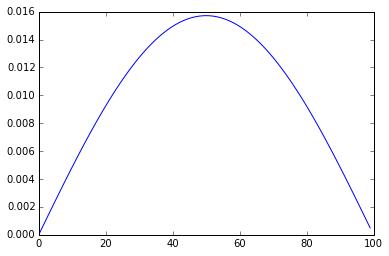

In [8]:
# exemple de fonction de repartion de la probabilte :

# probabilite de la proposition = 0.5, mais avec une information assez faible dessus,
#donc la fonction de repartion de la probabilite est etalee
import numpy as np
import matplotlib.pyplot as plt


n = 100

fpc = np.sin(np.arange(n)*np.pi/(n))
fpc = fpc / fpc.sum()

plot(fpc)



## Points difficiles

###### résolution du système d'équations

la méthode de résolution du systeme d'équations booléennes reste encore à trouver.

###### propositions quasi-certaines

Il y a-t-il plus de difference entre une proposition vraie à 50% et une à 60%, ou entre une à 90% et une à 99.99999999% ?

Si c'est la seconde possibilité, alors il faut un système correct de gestion des probabilité très proche de 1 et très proche de 0.

###### element neutre
Normalement un élément neutre est typiquement un élément sur lequel nous ne possédons aucune information. Voyons comment cela se retranscrit dans les fait.

Un element neutre est un element A tel que pour tout evenement X on ait $P(A\&X)=P(A)$ et $P(A||X)=P(X)$. Il suffit de prendre des evenements independants de A pour voir que l'on a forcement $P(A)=0$.

Le seul soucis etant que non A est a priori aussi un element neutre, or on ne peut avoir $P(\neg A)=P(A)=0$. Alors comment gérer les propositions sur lesquels l'information est quasiment nulle, mais dont la probabilité n'est pas nulle ? (en l'état de la connaissance, comme on dit ...)

## Voies à envisager

* Pour le descripteur de l'information disponible sur une proposition :

en notant 

$H^n(P(A)) = F_{H^{n-1}(P(A))}(t)$

avec 

$H^1(P(A)) = F_{P(A)}(t)$

faut-il prendre en compte la suite $H^1, H^2, H^3, ... , H^i, ... $  ?


* et quid de juste considerer un descripteur constitué de la probabilité de l'évenement, et de la connaissance (sous forme par exemple d'un scalaire) qu'on a sure lui ?

on pourrait avoir des evenement de probabilité non nulle et d'information nulle, 

un peu comme un dirac qui est d'intégrale 1 mais qui est infinement fin ...

et puis il y a une subtilité qui semble encore faire défaut ... 
un peu comme on prend la probabilité d'avoir une chose pour décrire la difficulté d'avoir la chose ...
par exemple gagner au loto c'est moins probable que de rentrer à l'ENS, mais est-ce que c'est dur ? est-ce qu'on peut parler de difficulté ?

* et sinon les difficultés que j'ai pour les systèmes avec peu d'information, ça fait pas un peu penser à une mesure de lebesgues ?


* note du 27 novembre : 
je me demande maintenant si l'information (ou le manque d'information) sur une proposition ne serait pas compris dans le graph ... du coup si on n'a aucune information sur une proposition on pourrait en fait supposer une certaine configuration dans le graphe ? genre une configuration moyenne ? 


#### idées pour l'incertitude :
trouver la variation de la probabilité d'une proposition A en fonction de la variation des probabilités des propositions B_i dont dépend A :

$\frac{d(F_A(t))}{d(F_{B_i(t)})} $

et après on prend la plus grande des dérivés partielles, ou la moyenne ou ce genre de chose ...

Du coup l'incertitude correspondrait juste à l'information de fisher, mais avec comme paramètre les probabilités des autres propositions ...

#### idées pour les feuilles :

les feuilles sont toutes completements vraies (ne peuvent etre que des faits), et ensuite il n'y a que des avis ...  (ca simplifie bcp de choses ...), mais ca parait compliqué 

#### idées pour une gestion generale :
que la valeur de vérité puissent être une proposition ? genre "la proba de telle proposition est de tant" ?

#### idées pour la sémantique de la probabilité :
Si P("les pommes sont rouges") = 0.8, cela ne veut pas dire que 80% des pommes sont rouges, cela veut dire que la probabilité que toutes les pommes sont rouges est de 80%. Si on sait que 80% des pommes sont rouges, alors on a P("les pommes sont rouges") = 0.

#### idées sur le genre de proposition possible :
à priori il serait impossible de faire une proposition du type "la probabilité de telle proposition est de 0.8". La raison pour laquelle ceci semble impossible n'est pas encore limpide, même si il semble que cela ait un rapport avec la différence existante entre un prédicat d'ordre 1, et un prédicat d'ordre supérieur. À priori, non seulement les phrases uyilisées dans ALB-Q sont toutes des prédicats d'ordre 1, mais en plus ce sont de simples propositions, dans le sens où c'est le calcul des propositions qui s'appliquent dans ALB-Q et non le calcul des prédicats, étant donné qu'on ne s'intéresse pas au contenu des propositions mais seulement aux relations qui les lient.

Il existe dans python.sympy.logic des fonctions qui permettend de faire des calculs de propositions, à voir si cela peut aider pour alb-Q :

http://docs.sympy.org/dev/modules/logic.html

également : 

http://fr.wikipedia.org/wiki/Calcul_des_propositions

http://en.wikipedia.org/wiki/Propositional_calculus

#### idées sur l'utilisation de l'incertitude:
si une proposition A avec un grand degre d'incertitude (disons, qui ne depend de l'avis que d'un utilisateur) tend a nier une proposition B qui est à la fois avec une probabilité importante et avec une incertitude faible (genre l'avis de plein d'utilisateurs et des expériences, ce genre de choses ...), alors la résolution du système devra tendre à diminuer la probabilité de la proposition A. A priori, tel qu'il semble actuellement être, le système comprend déjà ce cas de figure, cf reflexion sur la concurrence. Cependant c'est un point à vérifier.


#### idées pour la gestion de l'avis des utilisateurs:
donc chaque vote d'utilisateur est une proposition du style "michel pense ceci de telle proposition", qui elle est certaine, et une proposition "michel a toujours raison sur tel sujet", avec, en plus de cela, des covariance importante entre utilisateurs. 

du coup, vu que une seule des proposition est donnée comme certaine, les autres bougeront naturellement en fonction de l'avis des utilisateurs, si un utilisateurs vote beaucoup contre des propositions certaines, "michel a toujours raison sur tel sujet" aura une probabilité très faible (cf le morceau sur la concurrence entre proposition).

#### idées pour la gestion de l'avis des utilisateurs:
pourquoi ne pas appliquer une sorte de classement elo entre assertions ? étant donné tous les votes des utilisateurs quelle est la probabilité (en quelques sortes) que telle assertion soit plus vrais que telle autre ?

### travail sur la resolution de systeme d'equation ...

idées en vrac :

* utiliser une méthode de newton pour trouver le point fixe du système 

Pour la méthode de newton :
f(x) est la fonction qui donne l'ensemble des fonctions de répartitions de probabilité des propositions
à priori, si $X_0$ est la solution, on a :

$\lim\limits_{n \to \infty }f^n(x) \not = X_0$

vu que peut-etre que c'est un systeme instable ... (ou alors qui possede des minimums locaux) ..

donc il faudrait au minimum introduire une temperature, genre une sorte de recuit simulé (recuit sur $x$) ...

et ne pourrait-on pas utiliser une méthode du pivot pour résoudre le système ? (genre méthode du pivot mais tuné à la main :) ) 

# Travail sur l'implémentation

idée de base pour l'implémentation : 

On peut faire des calculs sur la fonction de répartition des probas, mais il faut aussi le faire en même temps sur les probas purs (qui elles donnent un résultat exact) afin de pouvoir ajsuter le résultat du calcul sur les fonction de répartition des probas.

###### travail sur le "et" logique

on suppose B et C connus et indépendant entre eux

on calcul A = B & C

on a donc P(P(A)) = P(P(A & C))

$F_{P(A)}(t) = P(P(A) >= t)$

et 

$f_{P(A)}(t) = P(P(A) == t)$

tout d'abord, nous allons supposer que B et C sont independants entre eux.

$f_{P(A)}(t) = P(P(A) == t) $

$f_{P(A)}(t) = \frac{\#(P(A)=t)}{\#P(A)}$

$f_{P(A)}(t) = \frac{\#((P(B)P(C))=t)}{\#P(B)P(C)}$

s'achant que :

$\#P(A) = \#P(B) = \#P(C) = 1 $ car on considere la probabilite des valeurs des differentes probalites.

In [9]:
from matplotlib import pyplot

In [10]:
# par exemple :
n = 100

fpc = np.sin(np.arange(n)*np.pi/(n))
fpc = fpc / fpc.sum()

fpb = np.ones(n)
fpb = fpb / fpb.sum()



#addition des deux fonctions de densite de la probabilite
fpa = np.zeros(n)

for i in range(n):
    for j in range(n):
        i_new = i + 0.5
        j_new = j + 0.5
        fpa[np.round(int(i_new*j_new/n))] += fpb[i] * fpc[j]
        
# TODO : faire une version qui gere un peu mieux la parti floor, parce que il y a des artefacts a cause du 
#        boxon entre le i*j et la fonction floor (ou round, suivant ce qui est utilisé ...)
#        genre si i * j  est egal a 0.55, le mettre a egalite entre [0.54; 0.55] et [0.55; 0.56]


# piste de reflexion :
# voir si une reflexion sur les logs des probas (ou l'inverse des logs ...) ne permettrait pas d'avoir une 
# plus grande precision ... genre au lieu de découper 0..1 de maniere reguliere, mettre plus de precision vers
# les 1 et les 0 ... (vers les 0 aussi pour garder une certaine de symetrie entre une proposition et sa negation)

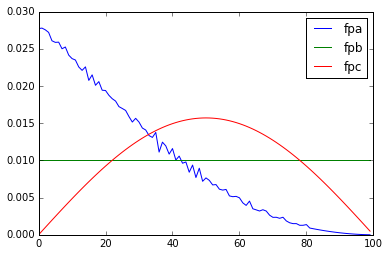

In [11]:
plot(fpa, label="fpa")
plot(fpb, label="fpb")
plot(fpc, label="fpc")
legend()

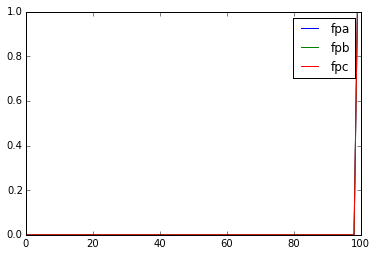

In [12]:
# cas ou B et C sont surs a 100%

fpb = np.zeros(n) ; fpb[-1] = 1
fpc = np.zeros(n) ; fpc[-1] = 1

fpa = np.zeros(n)

for i in range(n):
    for j in range(n):
        i_new = i + 0.5
        j_new = j + 0.5
        fpa[np.round(int(i_new*j_new/100))] += fpb[i] * fpc[j]
        
plot(fpa, label="fpa")
plot(fpb, label="fpb")
plot(fpc, label="fpc")
legend();


####### travail sur le "ou" logique

On suppose  B et C independants. 

Soit A tel que :

$A = B || C$

de manière générale, on a :

$P(B || C) = P(B) + P(C) - P(B \& C)$

dans le cas où B et C sont independants, on a :

$P(B || C) = P(B) + P(C) - P(B)P(C)$

donc, en notant $f_{P(A)}(t)$ la fonction de densite de la probabilite de A :

$f_{P(A)}(t) = P(P(A) == t)$

$f_{P(A)}(t) = P(P(B) + P(C) - P(B)P(C) == t)$

en travaillant dans le discret :

$f_{P(A)}(t) = \frac{\#(P(B) + P(C) - P(B)P(C) == t)}{\#P(B)P(C)}$


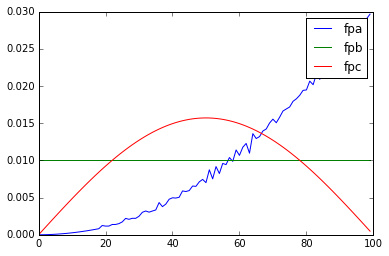

In [5]:
fpc = np.sin(np.arange(n)*np.pi/(n))
fpc = fpc / fpc.sum()

fpb = np.ones(n)
fpb = fpb / fpb.sum()

fpa = np.zeros(n)

for i in range(n):
    for j in range(n):
        i_new = i + 0.5
        j_new = j + 0.5
        k = np.round(int(i_new + j_new - (i_new*j_new)/100))
        fpa[k] += fpb[i] * fpc[j]
        
plot(fpa, label="fpa")
plot(fpb, label="fpb")
plot(fpc, label="fpc")
legend();

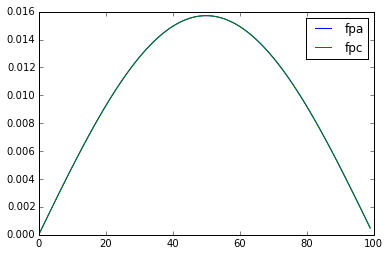

In [6]:
fpc = np.sin(np.arange(n)*np.pi/(n))
fpc = fpc / fpc.sum()

fpb = np.zeros(n)
fpb[0] = 1

fpa = np.zeros(n)

for i in range(n):
    for j in range(n):
        i_new = i + 0.5
        j_new = j + 0.5
        k = np.round(int(i_new + j_new - (i_new*j_new)/100))
        fpa[k] += fpb[i] * fpc[j]
        
plot(fpa, label="fpa")
#plot(fpb, label="fpb")
plot(fpc, label="fpc")
legend();

##### travail sur la negation

si on a 

$A = \neg B$

et que l'on a la fonction de densite de la probabilite de $A$ $F_{P(A)}(t)$, peut-on trouver $F_{P(B)}(t)$ ?

* $F_{P(\neg A)}(t) = P(P(\neg A) == t)$
* $F_{P(\neg A)}(t) = P(1 -P(A) == t)$
* $F_{P(\neg A)}(t) = P(P(A) == 1 - t)$
* $F_{P(\neg A)}(t) = F_{P(A)}(1 - t)$

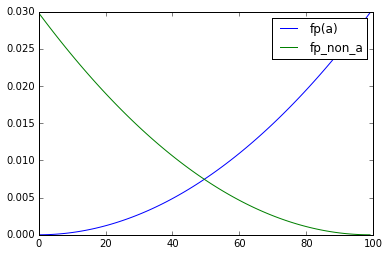

In [7]:
# negation en pratique
import numpy as np
import matplotlib.pyplot as plt

n = 100

fp_a = np.arange(n)**2
fp_a = fp_a / float(fp_a.sum())

fp_non_a = fp_a[::-1]
        
plot(fp_a, label="fp(a)")
plot(fp_non_a, label="fp_non_a")
legend();

#### travail sur la concurrence

mettons nous dans le cas où :

* $ B \rightarrow A $
* $ C \rightarrow \neg A $

avec $B$ et $C$ connus.

Donc on a : 

* $ B . \neg C  \rightarrow A $

qui devrait donner le meme resultat que :

* $ C . \neg B  \rightarrow \neg A $

enfin, cela introduit egalement une contrainte de la forme :

* $ C \rightarrow \neg B $

et 

* $ B \rightarrow \neg C $

Au final, lorsqu'une concurrence apparait, la contrainte ne se fait pas sur le calcul de $A$ (la proposition à droite des implications), mais bien sur une modification de $B$ et $C$, les propositions à gauche des implications.

Nota Bene : 

$ C \rightarrow \neg A $ implique  $ A \rightarrow \neg C $, donc il y a une certaine commutation de la relation, qui fait qu'il y a une certaine symetrie des conseaquences de cette relation.

Par contre $ C.D.E \rightarrow \neg A $ implique $ A \rightarrow \neg C + \neg D + \neg E $



### note

normalement il n'est pas necessaire d'avoir de jolie relation dans l'arbre pour que cela fonctionne ....

genre il faudrait que :

$A \& B \rightarrow C$

but 

$A \& \neg B \not \rightarrow C$

....

on peut avoir 

$A \& B \rightarrow C$

en ajoutant seulement 

$A \rightarrow C$

dans ce cas la premiere n'a plus aucune importance (via la resolution du systeme)

### Annexe : références interessantes

http://deepdive.stanford.edu/doc/general/inference.html    (notamment la page sur les factor graph, qui se rapprochent un peu de mon truc)

http://en.wikipedia.org/wiki/Propositional_calculus        (qui ressemble beaucoup à ce que je fais, même si c'est un peu plus compliqué)

http://docs.sympy.org/dev/modules/logic.html               (peut éventuellement fournir des outils pour utiliser mon machin)

http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0128193   (parcourir wikipedia pour faire du fact checking automatique)

http://news.indiana.edu/releases/iu/2015/06/computational-fact-checker.shtml  (parcouri wikipedia pour faire du fact checking automatique, article résumé)

### Annexe : bibliotheque utilisées dans albq

In [37]:
import pip

In [38]:
def nom_et_version(paquet):
    return paquet.project_name + " " + paquet.version

In [56]:
map(nom_et_version, pip.get_installed_distributions())

['backports.ssl-match-hostname 3.4.0.2',
 'basemap 1.0.7',
 'BeautifulSoup 3.2.1',
 'beautifulsoup4 4.3.2',
 'bigfloat 0.3.0',
 'bokeh 0.6.1',
 'certifi 14.05.14',
 'cffi 0.8.6',
 'click 3.3',
 'colorama 0.3.2',
 'cryptography 0.5.4',
 'Cython 0.20.2',
 'dbf 0.95.013',
 'decorator 3.4.0',
 'descartes 1.0.1',
 'enum34 1.0',
 'Fiona 1.2.0',
 'Flask 0.10.1',
 'geopy 1.9.1',
 'gevent 1.0.1',
 'gevent-websocket 0.9.3',
 'gnureadline 6.3.3',
 'google-api-python-client 1.2',
 'googleapiclient 1.2',
 'googlemaps 1.0.2',
 'GoogleMapsApi 0.02.0',
 'greenlet 0.4.5',
 'httplib2 0.9',
 'ipython 3.0.0',
 'itsdangerous 0.24',
 'Jinja2 2.7.3',
 'jsonschema 2.4.0',
 'lxml 3.3.6',
 'Markdown 2.5.1',
 'MarkupSafe 0.23',
 'matplotlib 1.4.3',
 'mistune 0.5.1',
 'mock 1.0.1',
 'mpmath 0.19',
 'networkx 1.9',
 'nose 1.3.4',
 'numpy 1.9.2',
 'oauth2client 1.2',
 'osmapi 0.3.1',
 'pandas 0.15.0',
 'pycparser 2.10',
 'pycrypto 2.6.1',
 'pygeocoder 1.2.5',
 'Pygments 1.6',
 'pyOpenSSL 0.14',
 'pyparsing 2.0.3',
